<center>

*******************************************************************************************
    
### Two-dimensional Density Estimation

##### 13 December 2024

##### Juan Ignacio Mendoza Garay  

*******************************************************************************************

</center>

##### INFORMATION:

* Description:

    Find peaks of signals, then compute their density preserving signal strength.
>
* Instructions:

    Edit the values indicated with an arrow like this: <---  
    Comment/uncomment or change values as suggested by the comments.  
    Run the program, close your eyes and hope for the best.  

*******************************************************************************************

In [211]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
import scipy.signal as sgnl
import cv2
import matplotlib.pyplot as plt

#### Parameters for test:

In [212]:
n_series = 6 # <--- number of series
length = 10000 # <--- length of series

#### Make synthetic data and find their peaks:

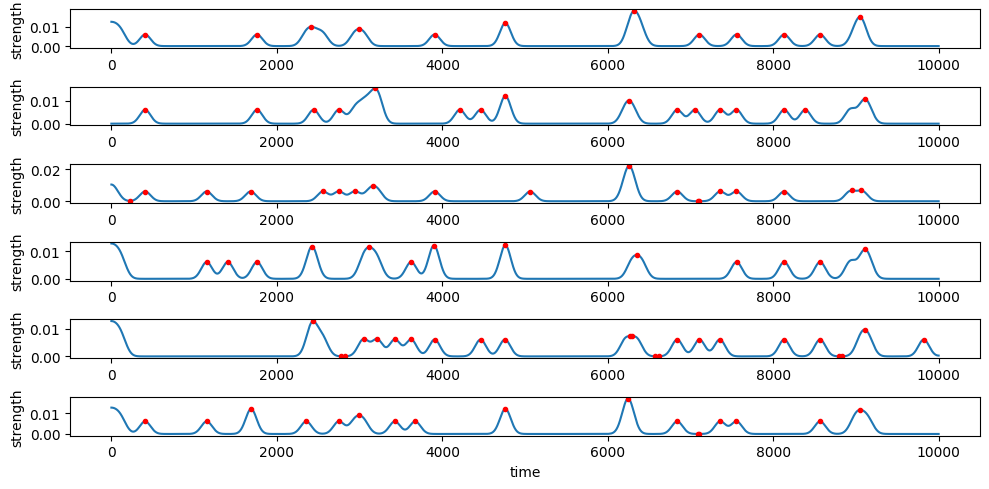

In [357]:
idx_peaks_mother = np.random.randint(1,length, np.random.randint(int(length/200),int(length/100)))
data_np = np.zeros((n_series,length))
pks_list = []
max_height = 0
for i_series in range(n_series):

    # make signal:
    idx_retain = np.random.randint(1,idx_peaks_mother.shape[0],int(idx_peaks_mother.shape[0]/2)) # retain half of the peaks
    idx_this = idx_peaks_mother[idx_retain]
    data_np[i_series,idx_this] = 1
    data_np[i_series,:] = gaussian_filter1d(data_np[i_series,:],int(length/150))
    
    # find peaks and their strength (height):
    idx_pks, pks_info = sgnl.find_peaks(data_np[i_series,:],height=0)
    pks_list.append([idx_pks, pks_info['peak_heights']])
    
    this_max = np.max(pks_list[i_series][1])
    if  this_max > max_height: max_height = this_max
    
plt.figure(figsize= (10,int(n_series/1.1)))
for i_series in range(n_series):
    plt.subplot(n_series,1,i_series+1)
    plt.plot(data_np[i_series,:])
    plt.plot(pks_list[i_series][0],pks_list[i_series][1],'.r')
    plt.ylabel('strength')
    if i_series == n_series-1: plt.xlabel('time')
plt.tight_layout()

***
### <center> Peak density and strength </center> 

#### Simple visualisation:

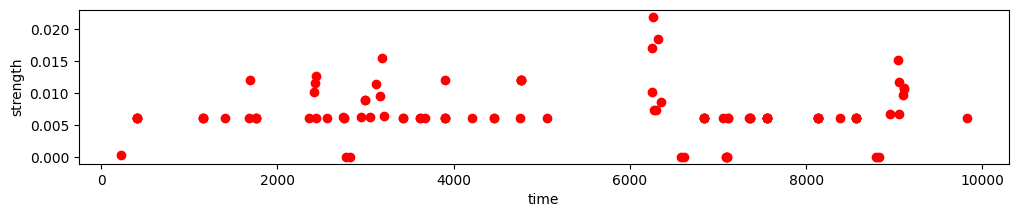

In [361]:
plt.figure(figsize=(12,2))
for i_series in range(n_series):
    plt.plot(pks_list[i_series][0],pks_list[i_series][1],'or')
    plt.ylabel('strength')
    if i_series == n_series-1: plt.xlabel('time')

#### Density-strength map:

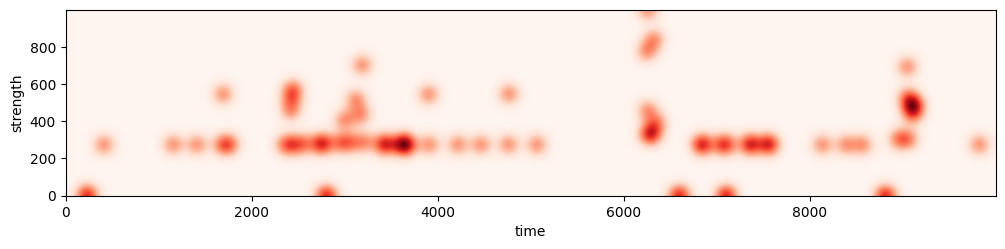

In [358]:
resolution = 1000
aspect_ratio = 0.5

density_np = np.zeros((resolution,length))
rescaling_factor = (resolution-1) / max_height 
for i_series in range(len(pks_list)):

    for i_peak in range(pks_list[i_series][1].shape[0]):

        y = int(pks_list[i_series][1][i_peak] * rescaling_factor)
        density_np[y, pks_list[i_series][0][i_peak] ] = 1 

kernel_length = resolution / 2
sigma = kernel_length/6
kernel_length = int(kernel_length)
kernel_length_half = int(kernel_length/2)
xx = np.linspace(-kernel_length_half,kernel_length_half,kernel_length)
yy = xx / aspect_ratio
xx, yy = np.meshgrid(xx, yy)
gauss_2D = 1. / (2. * np.pi * sigma**2) * np.exp(-(xx**2. / (2. * sigma**2.) + yy**2. / (2. * sigma**2.)))

density_smooth_np = cv2.filter2D(density_np,-1,gauss_2D)

plt.figure(figsize=(12,4))
plt.imshow(density_smooth_np,aspect=1/aspect_ratio,cmap='Reds');
plt.ylabel('strength')
plt.xlabel('time')
plt.gca().invert_yaxis();

Colour darkness corresponds to density.